# Introduction to neural network classification with tensorflow

In this notebook we're goinf to learn how to write neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples= n_samples,
noise= 0.03,
random_state= 42)

In [2]:
X.shape

(1000, 2)

In [3]:
y.shape

(1000,)

OUr data is little hard to understand right now... let's visualise

In [4]:
import pandas as pd
circles= pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


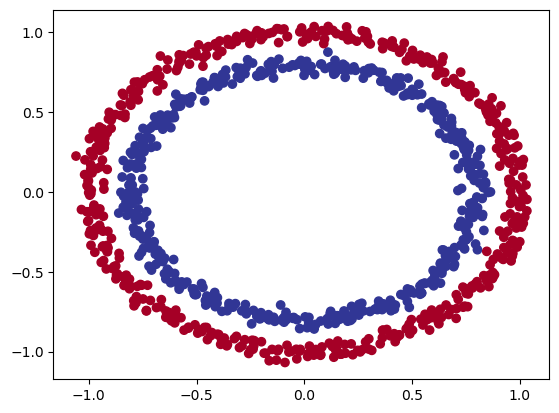

In [5]:
# Visualise with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.RdYlBu)

## Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

Steps in modelling:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Repeat

# Import tensorflow

In [7]:
import tensorflow as tf

In [8]:
tf.random.set_seed(42) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model.fit(X, y, epochs= 5)

Epoch 1/5


2024-01-30 10:47:22.220015: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 489us/step - loss: 5.3256 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 415us/step - loss: 5.2679 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 430us/step - loss: 5.1876 - accuracy: 0.4790
Epoch 4/5
32/32 [==============================] - 0s 355us/step - loss: 4.9331 - accuracy: 0.4770
Epoch 5/5
32/32 [==============================] - 0s 342us/step - loss: 4.7398 - accuracy: 0.4730


In [9]:
# Let's try and imporve our model by training longer
model.fit(X, y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 351us/step - loss: 2.7277 - accuracy: 0.4880


[2.727724313735962, 0.4880000054836273]

Since we are workling on a binary classification problem and our model is getting around 50% accuracy, it's performing as it is guessing.

So let's step things up and add an extra layer.

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_1.fit(X, y, epochs= 100, verbose= 0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 397us/step - loss: 0.6937 - accuracy: 0.5000


[0.6937469840049744, 0.5]

In [12]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Improving our model

Let's look in to our bag of tricks to see how we can imporve our model.

1. Create a model - We might want to:
    1. Add more layers
    2. Add more units
2. Compiling a model: We might want to:
    1. Choose a different optimiser function
3. Fitting a model: We might fit for more epochs

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), 
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X, y, epochs= 100, verbose= 0)

In [14]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 378us/step - loss: 0.6932 - accuracy: 0.5110


[0.6931904554367065, 0.5109999775886536]

In [15]:
y_pred = model_2.predict(X)
y_pred

32/32 [==============================] - 0s 298us/step


array([[0.49665678],
       [0.50668186],
       [0.5070162 ],
       [0.5029508 ],
       [0.5015576 ],
       [0.50355166],
       [0.500197  ],
       [0.4967574 ],
       [0.5052732 ],
       [0.50034344],
       [0.50771695],
       [0.49629816],
       [0.50080276],
       [0.49822456],
       [0.4997389 ],
       [0.5028577 ],
       [0.50912195],
       [0.5034742 ],
       [0.5077387 ],
       [0.50822645],
       [0.4969294 ],
       [0.50363797],
       [0.50482625],
       [0.49663153],
       [0.5069029 ],
       [0.50774086],
       [0.4977948 ],
       [0.49716753],
       [0.5024658 ],
       [0.49905574],
       [0.50650144],
       [0.50108284],
       [0.5001036 ],
       [0.49558234],
       [0.50545216],
       [0.5055339 ],
       [0.504397  ],
       [0.49742377],
       [0.50233424],
       [0.4956743 ],
       [0.50800675],
       [0.49741277],
       [0.5085276 ],
       [0.4973414 ],
       [0.50905806],
       [0.50896966],
       [0.50081927],
       [0.498

To visualise our model's predictions, let's create a function 'plot_decision_boundary()'. This function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different feature values
* Make predictions across the meshgrid* Plot the predictions as well as a line between zones

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/319 [..............................] - ETA: 2s

319/319 [==============================] - 0s 254us/step
doing binary classification


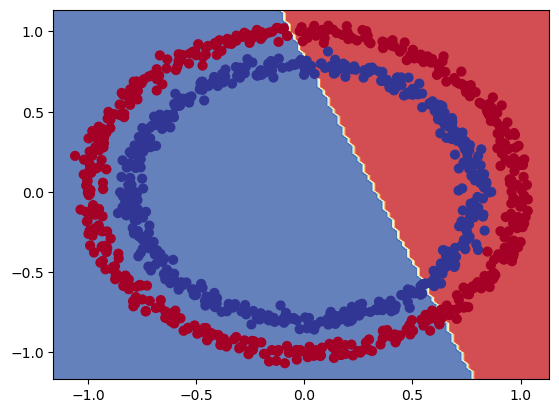

In [18]:
# Check out the predictions our model is making

plot_decision_boundary(model= model_2,
                       X= X, 
                       y= y)

In [19]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_regression[:150], X_regression[150:], y_regression[:150], y_regression[150:]

model_2.fit(X_reg_train, y_reg_train)

ValueError: in user code:

    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But we are now working on a regression problem, let's change the model to suit our data

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis= 1), y_reg_train, epochs= 100)

Epoch 1/100


5/5 [==============================] - 0s 1ms/step - loss: 392.1121 - mae: 392.1121
Epoch 2/100
5/5 [==============================] - 0s 744us/step - loss: 278.1401 - mae: 278.1401
Epoch 3/100
5/5 [==============================] - 0s 893us/step - loss: 168.0968 - mae: 168.0968
Epoch 4/100
5/5 [==============================] - 0s 745us/step - loss: 59.8361 - mae: 59.8361
Epoch 5/100
5/5 [==============================] - 0s 898us/step - loss: 71.9754 - mae: 71.9754
Epoch 6/100
5/5 [==============================] - 0s 734us/step - loss: 83.0484 - mae: 83.0484
Epoch 7/100
5/5 [==============================] - 0s 765us/step - loss: 55.7268 - mae: 55.7268
Epoch 8/100
5/5 [==============================] - 0s 808us/step - loss: 46.6600 - mae: 46.6600
Epoch 9/100
5/5 [==============================] - 0s 750us/step - loss: 46.8893 - mae: 46.8893
Epoch 10/100
5/5 [==============================] - 0s 752us/step - loss: 43.2477 - mae: 43.2477
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 1ms/step


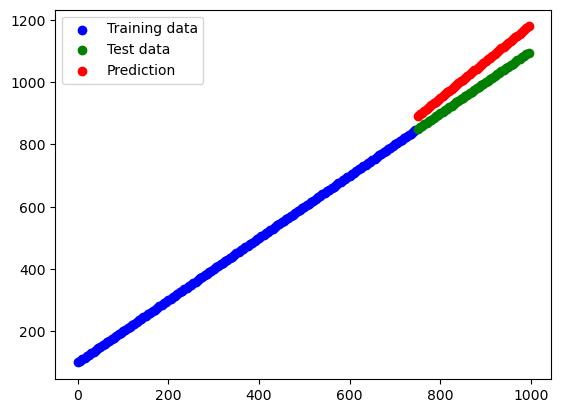

In [21]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figure = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label= "Training data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label= 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label= 'Prediction')
plt.legend()

## The missing piece: Non-linearity

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'linear')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

model_4.fit(X, y, epochs= 100)

Epoch 1/100


32/32 [==============================] - 0s 536us/step - loss: 4.3232 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 442us/step - loss: 4.2893 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 416us/step - loss: 4.2478 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 322us/step - loss: 4.2265 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 321us/step - loss: 4.2099 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 309us/step - loss: 4.1925 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 326us/step - loss: 4.1328 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 314us/step - loss: 4.0340 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 321us/step - loss: 3.9838 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 388us/step - loss: 3.9388 - accuracy: 0.4720
E

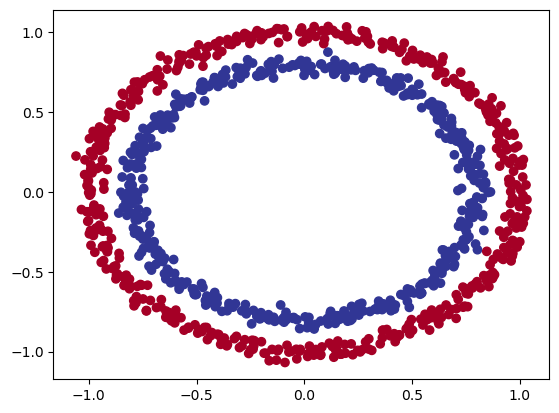

In [23]:
#Check out our data
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

151/319 [=============>................] - ETA: 0s

319/319 [==============================] - 0s 301us/step
doing binary classification


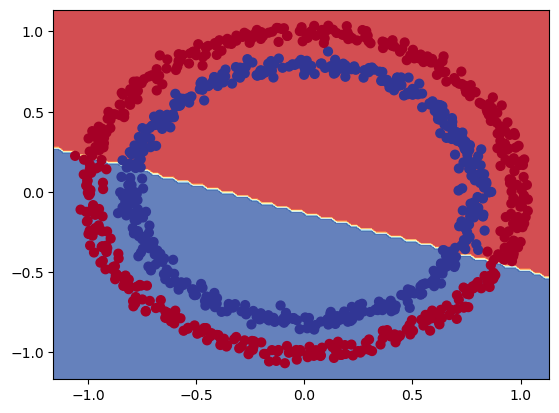

In [24]:
#Check the dedcision boundary for our latest model
plot_decision_boundary(model= model_4,
                       X=X, y=y)

Let's create our first neural network with a non-linear activation function

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'relu')
])

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_5.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 545us/step - loss: 4.3433 - accuracy: 0.4440
Epoch 2/100
32/32 [==============================] - 0s 457us/step - loss: 4.2990 - accuracy: 0.4520
Epoch 3/100
32/32 [==============================] - 0s 401us/step - loss: 4.2248 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 319us/step - loss: 4.0994 - accuracy: 0.4560
Epoch 5/100
32/32 [==============================] - 0s 309us/step - loss: 4.0035 - accuracy: 0.4570
Epoch 6/100
32/32 [==============================] - 0s 325us/step - loss: 3.9494 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 339us/step - loss: 3.8712 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 317us/step - loss: 3.7836 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 306us/step - loss: 3.6671 - accuracy: 0.4590
Epoch 10/100
32/32 [==============================] - 0s 333us/step - loss: 3.5819 - accura

319/319 [==============================] - 0s 248us/step
doing binary classification


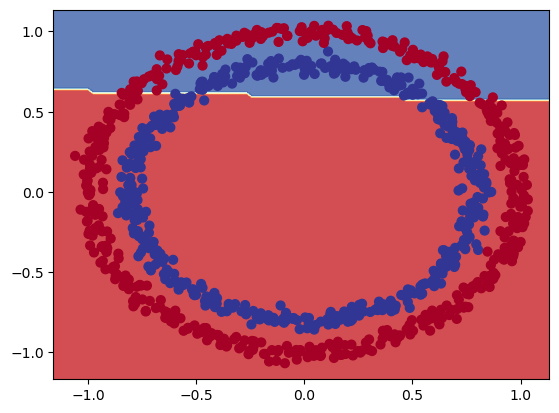

In [26]:
plot_decision_boundary(model_5, X, y)

In [27]:
# Time to replicate the mutli-layer neural network from Tensorflow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_6.fit(X, y, epochs= 250, verbose= 0)

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 396us/step - loss: 0.5022 - accuracy: 0.7470


[0.5022305846214294, 0.746999979019165]

319/319 [==============================] - 0s 244us/step
doing binary classification


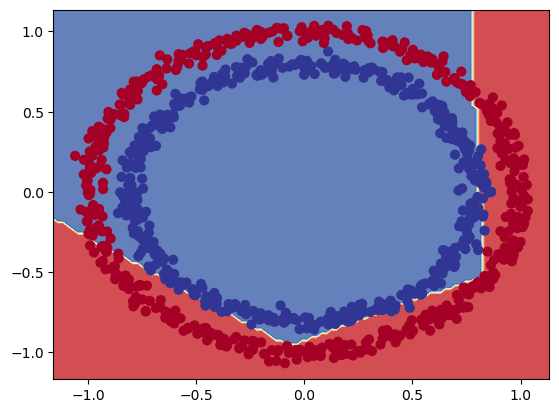

In [29]:
# How do our model prediction look
plot_decision_boundary(model= model_6, X= X,y= y)
plt.show()

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'softmax')
])

model_7.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics=['accuracy'])

model_7.fit(X, y, epochs= 250, verbose= 0)

In [31]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 414us/step - loss: 0.1136 - accuracy: 0.5000


[0.11360501497983932, 0.5]

319/319 [==============================] - 0s 248us/step
doing binary classification


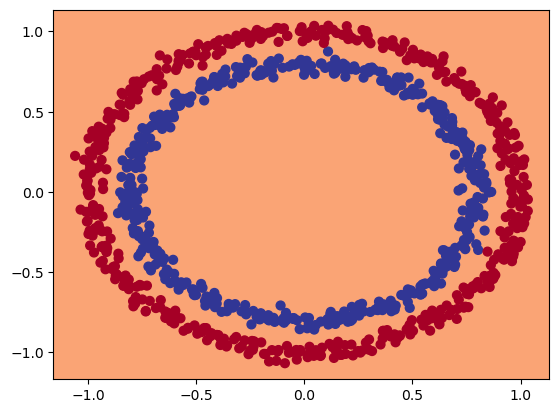

In [32]:
plot_decision_boundary(model_7, X, y)

**Question**: What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What dazta did the model learn on and what data di we predict on.

**Noteo**: Thew combination of **linear** and **non-linear** is one of the key fundamentals of neural networks.

Let's implement linear and non-linear concepts

In [33]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

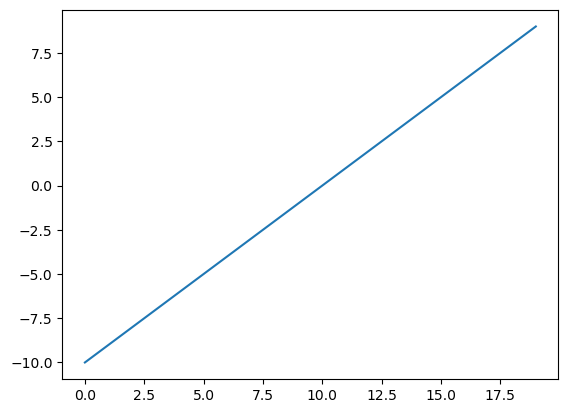

In [34]:
#Visualise our toy tensor

plt.plot(A)

In [35]:
# Let's start replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

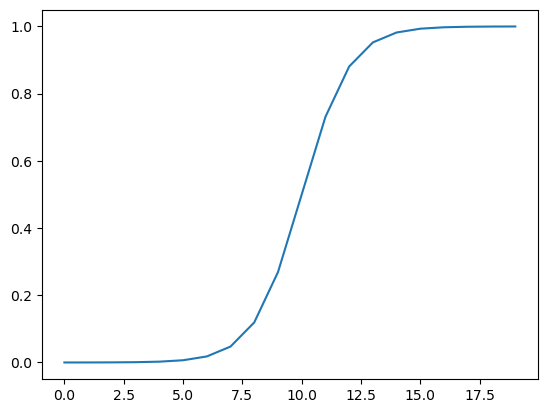

In [36]:
# Plot our toy tensor transformed into sigmoid
plt.plot(sigmoid(A))

In [37]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

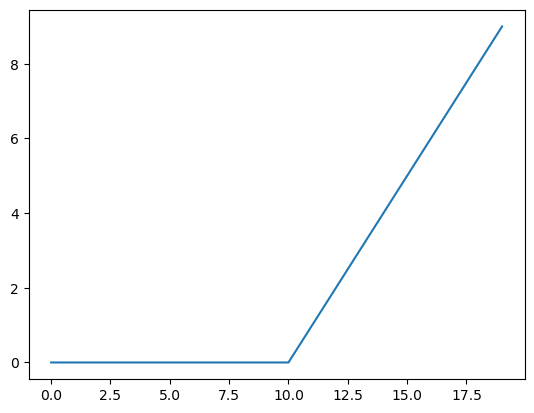

In [38]:
plt.plot(relu(A))

In [39]:
def linear(x):
    return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

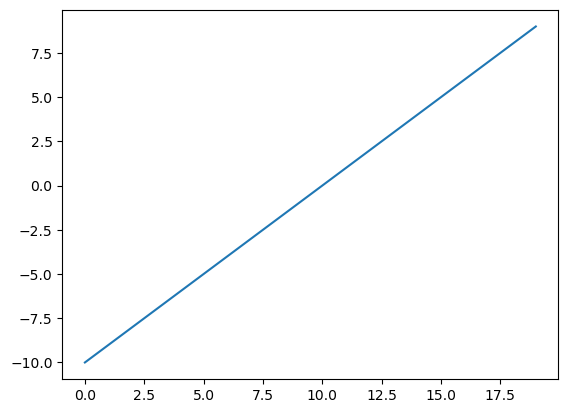

In [40]:
plt.plot(linear(A))

**Reesource**: [Activation function link](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluating and improving our classification

So far we've been training and testing on the same data set

Let's cerate a training and test set

In [41]:
X.shape

(1000, 2)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [45]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_8.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics= ['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs= 25)

Epoch 1/25


25/25 [==============================] - 0s 600us/step - loss: 0.6866 - accuracy: 0.5213
Epoch 2/25
25/25 [==============================] - 0s 517us/step - loss: 0.6793 - accuracy: 0.5500
Epoch 3/25
25/25 [==============================] - 0s 498us/step - loss: 0.6726 - accuracy: 0.5650
Epoch 4/25
25/25 [==============================] - 0s 421us/step - loss: 0.6683 - accuracy: 0.5738
Epoch 5/25
25/25 [==============================] - 0s 346us/step - loss: 0.6627 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 360us/step - loss: 0.6577 - accuracy: 0.5888
Epoch 7/25
25/25 [==============================] - 0s 361us/step - loss: 0.6514 - accuracy: 0.5900
Epoch 8/25
25/25 [==============================] - 0s 332us/step - loss: 0.6450 - accuracy: 0.5950
Epoch 9/25
25/25 [==============================] - 0s 348us/step - loss: 0.6383 - accuracy: 0.6050
Epoch 10/25
25/25 [==============================] - 0s 340us/step - loss: 0.6278 - accuracy: 0.6275
Epoch 11/2

In [46]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 577us/step - loss: 0.4132 - accuracy: 0.8300


[0.41320517659187317, 0.8299999833106995]

319/319 [==============================] - 0s 243us/step
doing binary classification
319/319 [==============================] - 0s 241us/step
doing binary classification


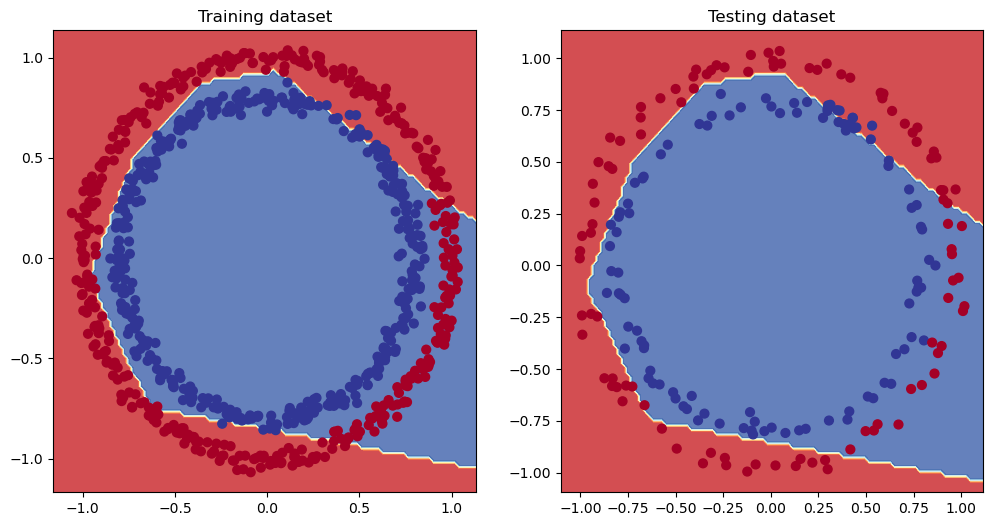

In [47]:
# Plot for both training and test set
plt.figure(figsize= (12, 6))

plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss curves

In [48]:
# Convert the history object into a dataframe

pd.DataFrame(history_8.history)

,loss,accuracy
0,0.686569,0.52125
1,0.679298,0.55000
2,0.672595,0.56500
3,0.668315,0.57375
4,0.662729,0.56000
5,0.657716,0.58875
6,0.651421,0.59000
7,0.644958,0.59500
8,0.638309,0.60500
9,0.627782,0.62750


<Axes: >

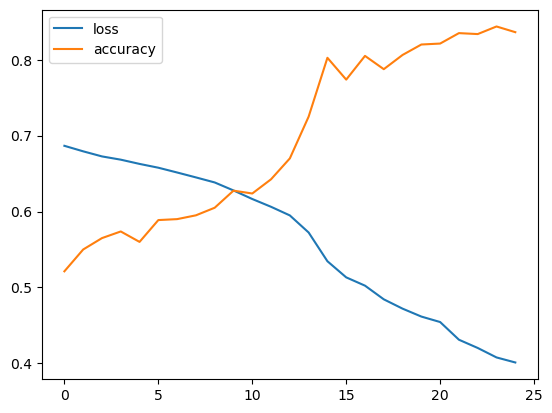

In [49]:
# Plot the loss curves

pd.DataFrame(history_8.history).plot()

**Note**: For many problems, the loss function going down means it is improving.

## Finding the best learning rate

To find the ideal learning rate, we're going to use the following steps:

1. A learing rate **callback** - an extra functionality added to the model **while** training it

2. Another model.

3. A modified loss curve.

In [50]:
# Set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_9.compile(loss= 'binary_crossentropy',
                optimizer= "Adam",
                metrics= ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

#Fit the model
histor_9 = model_9.fit(X_train, y_train, 
                       epochs= 100,
                       callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 588us/step - loss: 0.7107 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 559us/step - loss: 0.7099 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 523us/step - loss: 0.7090 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 458us/step - loss: 0.7082 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 335us/step - loss: 0.7074 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 327us/step - loss: 0.7065 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 342us/step - loss: 0.7057 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 331us/step - loss: 0.7048 - accuracy: 0.4725 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: >

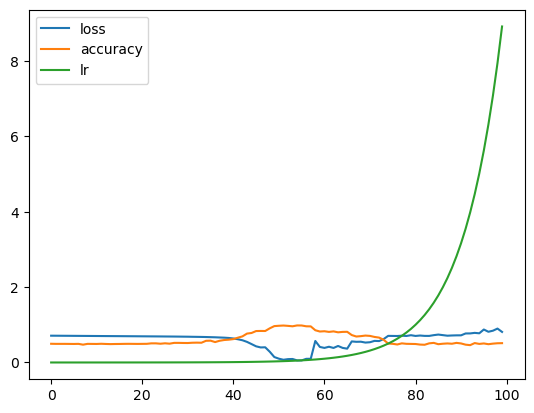

In [51]:
# Checkout the history
pd.DataFrame(histor_9.history).plot()

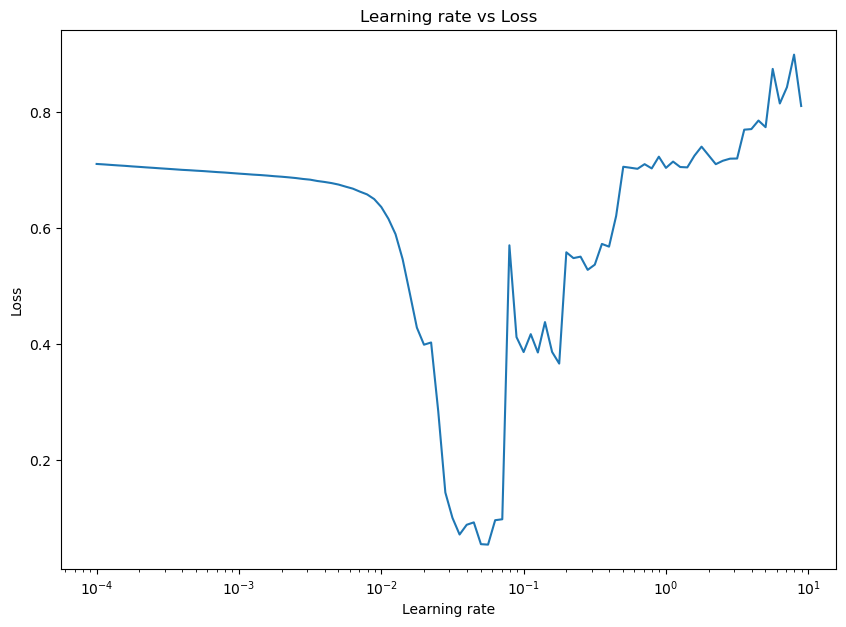

In [52]:
# Plot the learning rate vs the loss
lrs = histor_9.history['lr']
plt.figure(figsize= (10, 7))
plt.semilogx(lrs, histor_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [53]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Let's use a higher *ideal* learning rate with same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_10.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics= ['accuracy'])

histor_10 = model_10.fit(X_train, y_train, epochs= 20)

Epoch 1/20


25/25 [==============================] - 0s 631us/step - loss: 0.6911 - accuracy: 0.5188
Epoch 2/20
25/25 [==============================] - 0s 530us/step - loss: 0.6723 - accuracy: 0.5700
Epoch 3/20
25/25 [==============================] - 0s 472us/step - loss: 0.6554 - accuracy: 0.6050
Epoch 4/20
25/25 [==============================] - 0s 439us/step - loss: 0.6387 - accuracy: 0.6212
Epoch 5/20
25/25 [==============================] - 0s 334us/step - loss: 0.6166 - accuracy: 0.6438
Epoch 6/20
25/25 [==============================] - 0s 342us/step - loss: 0.6035 - accuracy: 0.6675
Epoch 7/20
25/25 [==============================] - 0s 342us/step - loss: 0.5418 - accuracy: 0.7075
Epoch 8/20
25/25 [==============================] - 0s 329us/step - loss: 0.4957 - accuracy: 0.7650
Epoch 9/20
25/25 [==============================] - 0s 366us/step - loss: 0.4627 - accuracy: 0.7800
Epoch 10/20
25/25 [==============================] - 0s 348us/step - loss: 0.3750 - accuracy: 0.8350
Epoch 11/2

In [55]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 584us/step - loss: 0.0812 - accuracy: 0.9750


[0.08115227520465851, 0.9750000238418579]

In [56]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 553us/step - loss: 0.4132 - accuracy: 0.8300


[0.41320517659187317, 0.8299999833106995]

319/319 [==============================] - 0s 247us/step
doing binary classification
319/319 [==============================] - 0s 239us/step
doing binary classification


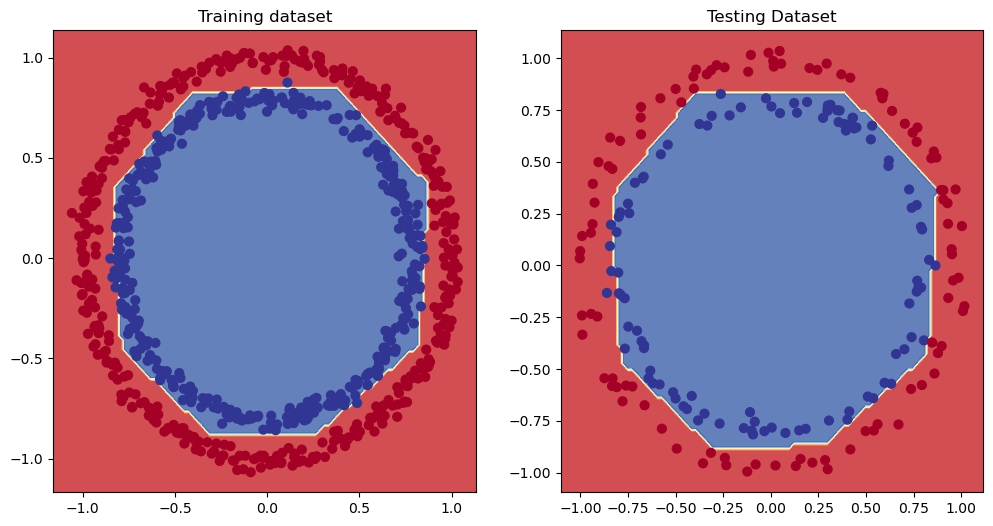

In [57]:
# Plot the decisoin boundaries for the training and test sets

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset")
plot_decision_boundary(model_10, X_test, y_test)

## More classification Evaluation Methods

There are other classification evaluation methods which are helpful for monitoring the performance:

* Accuracy
* Precision
* Recall
* F1-score 
* Confusion Matrix
* Classification report from scikit-learn

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {(accuracy * 10):.2f}")

1/7 [===>..........................] - ETA: 0s - loss: 0.0298 - accuracy: 1.0000

7/7 [==============================] - 0s 603us/step - loss: 0.0812 - accuracy: 0.9750
Model loss on the test set: 0.08
Model accuracy on the test set: 9.75


How about a confusion matrix?

In [59]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  5,  95]])

In [60]:
y_pred[:10]

array([[9.8825151e-01],
       [1.8549812e-04],
       [9.8825151e-01],
       [8.1133730e-05],
       [8.5996741e-01],
       [6.8927222e-01],
       [1.1571545e-05],
       [8.4826650e-05],
       [9.7650003e-01],
       [7.3171970e-05]], dtype=float32)

Our prediction has come out to in **prediction probability** from standard output

How about we prettify our confusion matrix?

**Note**: the confusion matrix code is a remix of scikit-learn plot_confusion_matrix code

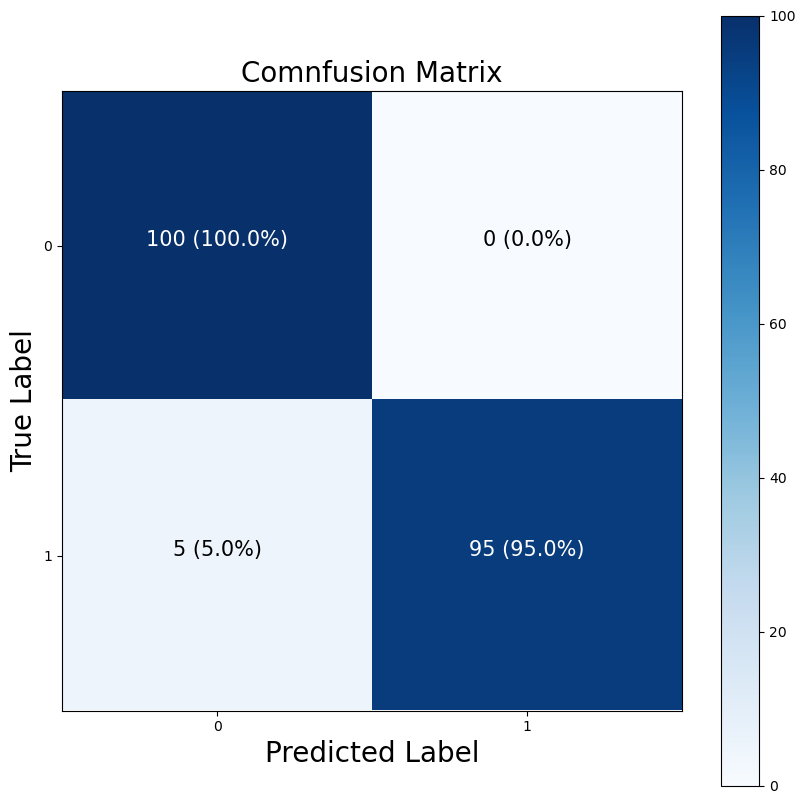

In [61]:
import itertools

figsize = (10, 10)

#Xreate the confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's pretify it
fig, ax = plt.subplots(figsize= figsize)

cax = ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title= "Comnfusion Matrix",
       xlabel= "Predicted Label",
       ylabel= "True Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels) 

# Set axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

#Plot the tect on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment= "center", 
             color= "white" if cm[i, j] > threshold else "black",
             size= 15)



In [117]:
def plot_confusion_matrix(y_true, y_pred, classes= False, figsize= (10, 10), text_size= 15):
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''
    #Xreate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretify it
    fig, ax = plt.subplots(figsize= figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title= "Comnfusion Matrix",
        xlabel= "Predicted Label",
        ylabel= "True Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels) 

    # Set axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    #Plot the tect on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment= "center", 
                color= "white" if cm[i, j] > threshold else "black",
                size= text_size)


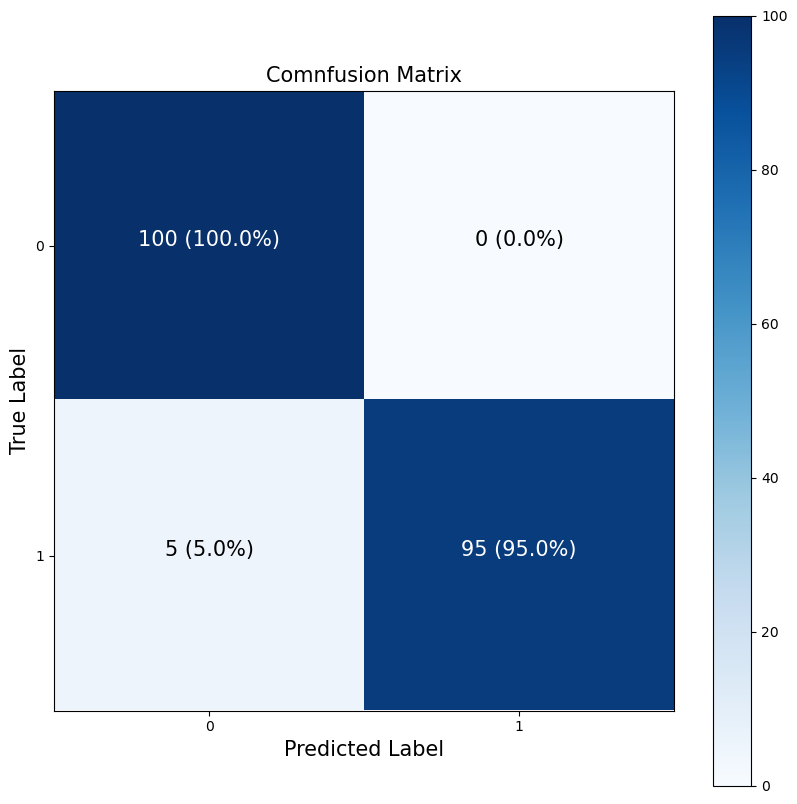

In [118]:
plot_confusion_matrix(y_test, y_pred.round())

# Working with larger example (Mulitclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [63]:
from tensorflow.keras.datasets import fashion_mnist

# The dataset is already sorted into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [64]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [65]:
# Show the first training sample
print(f"Training sample: \n { train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [66]:
# Check the shape of a single sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

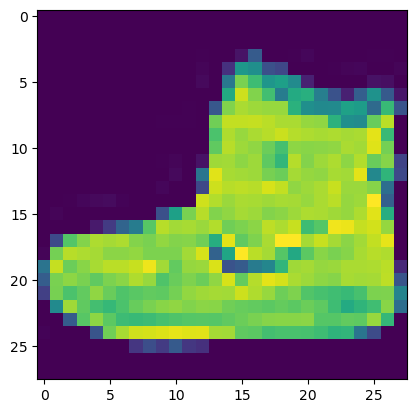

In [67]:
#Plot a single sample
plt.imshow(train_data[0])

In [68]:
# Create a small list so we can index onto out training labels so they're readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

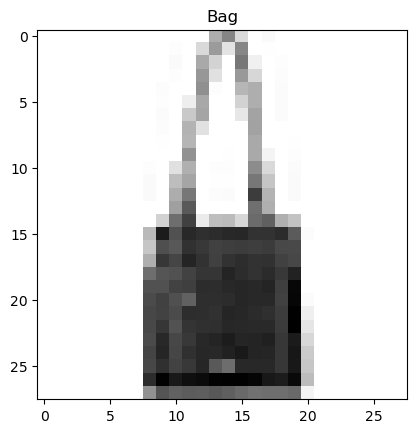

In [69]:
# Plot another image along with its label
index_of_choice = 200
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

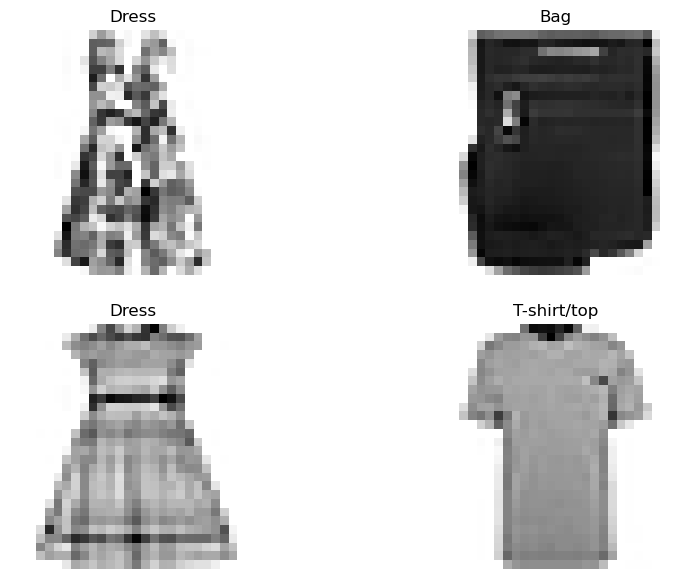

In [70]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize= (10, 7))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Build a multiclass classification model

Withj a few changes we can use the similar architecture of binary classification. Changes:
* Input shape: (28, 28) **Shape of the image**
* Output shape: 10 **Number of classes**
* Loss function: tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If you labels are in integer form, use SparseCategoricalCrossentropy()
* Output layer activation: **Softmax**

In [72]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth= 10), 
                                epochs= 10, 
                                validation_data= (test_data, tf.one_hot(test_labels, depth= 10)))

Epoch 1/10
1875/1875 [==============================] - 1s 406us/step - loss: 2.4712 - accuracy: 0.0985 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 364us/step - loss: 1.9928 - accuracy: 0.1912 - val_loss: 1.7956 - val_accuracy: 0.2561
Epoch 3/10
1875/1875 [==============================] - 1s 371us/step - loss: 1.7560 - accuracy: 0.2416 - val_loss: 1.7050 - val_accuracy: 0.2506
Epoch 4/10
1875/1875 [==============================] - 1s 376us/step - loss: 1.7158 - accuracy: 0.2530 - val_loss: 1.6872 - val_accuracy: 0.2537
Epoch 5/10
1875/1875 [==============================] - 1s 370us/step - loss: 1.6903 - accuracy: 0.2607 - val_loss: 1.6823 - val_accuracy: 0.2616
Epoch 6/10
1875/1875 [==============================] - 1s 366us/step - loss: 1.6738 - accuracy: 0.2724 - val_loss: 1.6530 - val_accuracy: 0.2974
Epoch 7/10
1875/1875 [==============================] - 1s 379us/step - loss: 1.6750 - accuracy: 0.2733 - val_loss: 1.7732 -

In [73]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled, which means they like to have the numbers in the tensors between 0 and 1

In [77]:
# We can get our training and testing data between 0 and 1 by diving with maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min value of the normalised data
train_data_norm.min(), train_data_norm.max() 

(0.0, 1.0)

In [79]:
# Now our data is normalised let's build model

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

norm_history= model_12.fit(train_data_norm, 
                           train_labels,
                           epochs= 10,
                           validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 413us/step - loss: 1.3231 - accuracy: 0.4874 - val_loss: 1.0253 - val_accuracy: 0.6361
Epoch 2/10
1875/1875 [==============================] - 1s 372us/step - loss: 0.9431 - accuracy: 0.6767 - val_loss: 0.8978 - val_accuracy: 0.6882
Epoch 3/10
1875/1875 [==============================] - 1s 378us/step - loss: 0.8544 - accuracy: 0.7050 - val_loss: 0.8478 - val_accuracy: 0.7049
Epoch 4/10
1875/1875 [==============================] - 1s 373us/step - loss: 0.8199 - accuracy: 0.7122 - val_loss: 0.8256 - val_accuracy: 0.7154
Epoch 5/10
1875/1875 [==============================] - 1s 366us/step - loss: 0.8034 - accuracy: 0.7186 - val_loss: 0.8102 - val_accuracy: 0.7191
Epoch 6/10
1875/1875 [==============================] - 1s 364us/step - loss: 0.7933 - accuracy: 0.7211 - val_loss: 0.8090 - val_accuracy: 0.7151
Epoch 7/10
1875/1875 [==============================] - 1s 381us/step - loss: 0.7871 - accuracy: 0.7222 - val_loss: 0.8134 -

**Note**: Neural networks tend to prefer data in numerical form as well as scaled/normalised

<Axes: title={'center': 'Normalised Data'}>

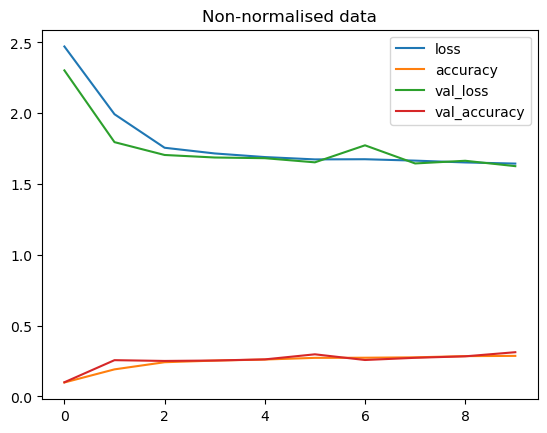

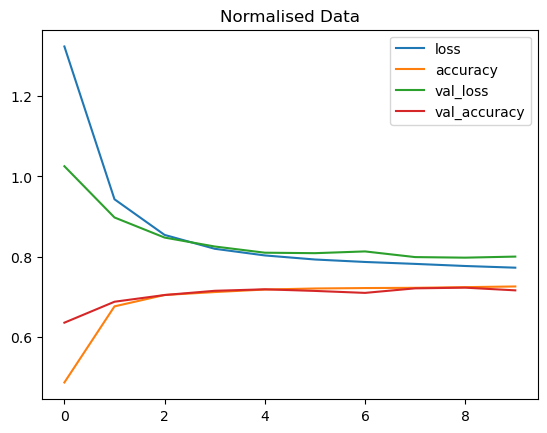

In [83]:
#plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title= "Non-normalised data")
pd.DataFrame(norm_history.history).plot(title= "Normalised Data")

**Note**: The same model with even slightly different data can produce dramatically different results. So when your're comparing model, it's important to make sure you're comapring them on the same criteria

## Finding the ideal learning rate

In [85]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

lr_scheduler_1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data= (test_data_norm, test_labels),
                               callbacks= [lr_scheduler_1])

Epoch 1/40
1875/1875 [==============================] - 1s 421us/step - loss: 1.0922 - accuracy: 0.6173 - val_loss: 0.7722 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 382us/step - loss: 0.6949 - accuracy: 0.7467 - val_loss: 0.7057 - val_accuracy: 0.7442 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 373us/step - loss: 0.6402 - accuracy: 0.7617 - val_loss: 0.6585 - val_accuracy: 0.7526 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 377us/step - loss: 0.6150 - accuracy: 0.7693 - val_loss: 0.6434 - val_accuracy: 0.7607 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 372us/step - loss: 0.5971 - accuracy: 0.7760 - val_loss: 0.6119 - val_accuracy: 0.7769 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 372us/step - loss: 0.5732 - accuracy: 0.7893 - val_loss: 0.6058 - val_accuracy: 0.7856 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0, 0.5, 'Learning rate')

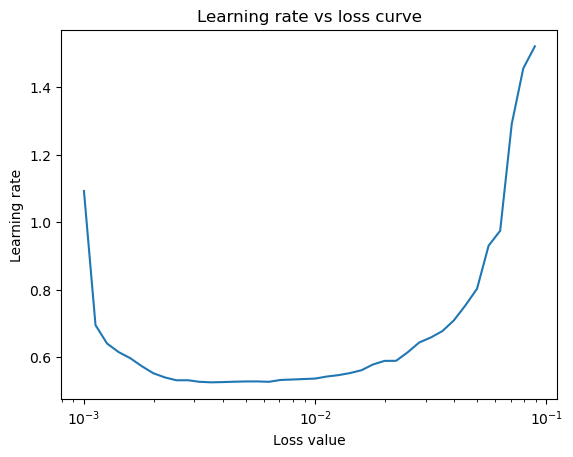

In [94]:
# Plot learning rate vs loss curve
lrs= find_lr_history.history['lr']
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.title("Learning rate vs loss curve")
plt.xlabel("Loss value")
plt.ylabel("Learning rate")

In [95]:
10**-3, 2e-3

(0.001, 0.002)

In [97]:
#Let's refit our model with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                 metrics= ['accuracy'])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs= 20,
                          validation_data= (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 401us/step - loss: 1.0048 - accuracy: 0.6211 - val_loss: 0.7553 - val_accuracy: 0.7192
Epoch 2/20
1875/1875 [==============================] - 1s 373us/step - loss: 0.6859 - accuracy: 0.7497 - val_loss: 0.6841 - val_accuracy: 0.7568
Epoch 3/20
1875/1875 [==============================] - 1s 365us/step - loss: 0.6161 - accuracy: 0.7789 - val_loss: 0.6229 - val_accuracy: 0.7797
Epoch 4/20
1875/1875 [==============================] - 1s 375us/step - loss: 0.5840 - accuracy: 0.7918 - val_loss: 0.6155 - val_accuracy: 0.7867
Epoch 5/20
1875/1875 [==============================] - 1s 359us/step - loss: 0.5612 - accuracy: 0.8036 - val_loss: 0.5823 - val_accuracy: 0.7964
Epoch 6/20
1875/1875 [==============================] - 1s 382us/step - loss: 0.5431 - accuracy: 0.8121 - val_loss: 0.5879 - val_accuracy: 0.8009
Epoch 7/20
1875/1875 [==============================] - 1s 363us/step - loss: 0.5300 - accuracy: 0.8193 - val_loss: 0.5712 -

## Evaluating our multiclass classification model

To evaluate our multiclass classification model, we could:
* Evaluate performance using other classification metrics
* Assess some of its predicitons
* Improve its results
* Save and export to use in application

Let's go through the top 2

In [109]:
# Create a confusion matrix
test_predictions = tf.argmax(model_14.predict(test_data_norm), axis= 1)

test_predictions.shape


313/313 [==============================] - 0s 371us/step


TensorShape([10000])

**Note**: Remember to make predictions on the smae kind of data your model was trained on

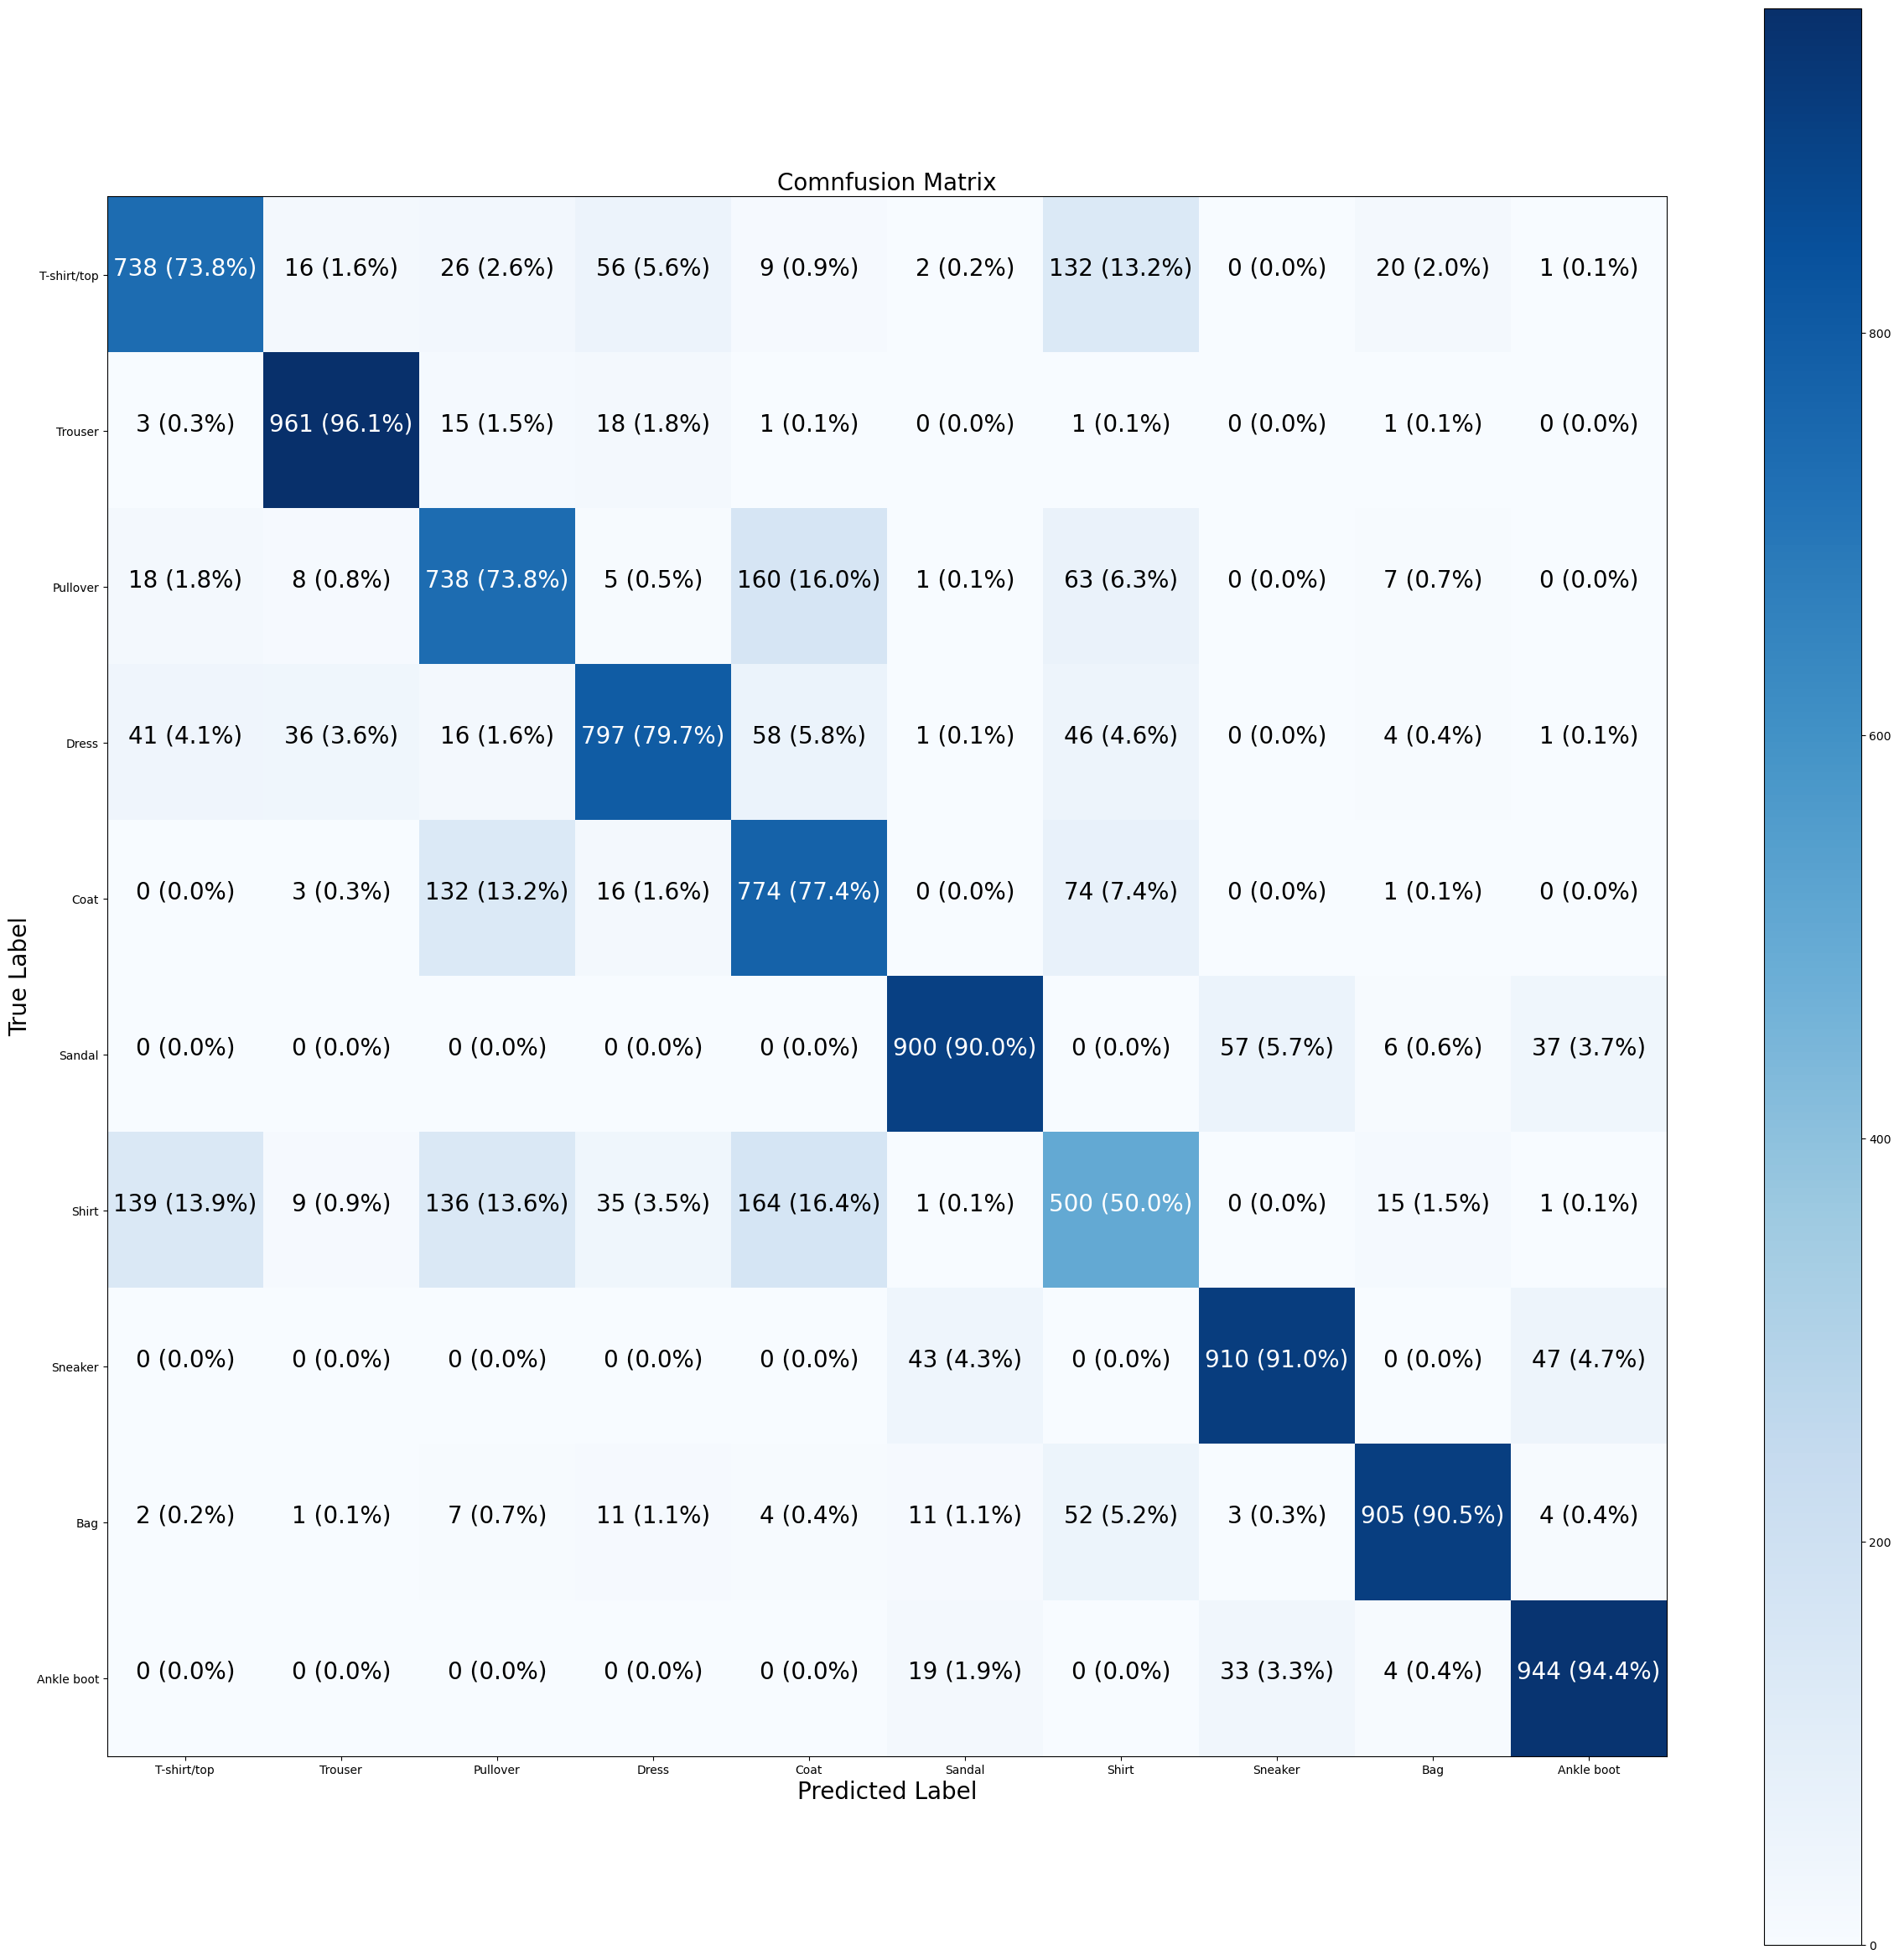

In [133]:
plot_confusion_matrix(test_labels, 
                    test_predictions,
                    classes= class_names, 
                    figsize= (30, 30), 
                    text_size= 20)

**Note**: Often when working with images and other forms of visual data, it's a good idea  to visualise as much possible to develop a further understanding  of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & predict label

In [137]:
def plot_random_iamge(model, images, true_labels, classes):
    '''
    Picks a random image, plots it and labels it with a prediction and truth label.
    '''

    # Set up random integer
    i = random.randint(0, len(images))

    #Create predictions and target
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_prob.argmax()]
    true_label = classes[true_labels[i]]

    #Plot the image
    plt.imshow(target_image, cmap= plt.cm.binary)

    #Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color= 'green'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {pred_label} {100 * tf.reduce_max(pred_prob):.2f}% (True: {true_label})", color= color)

1/1 [==============================] - 0s 12ms/step


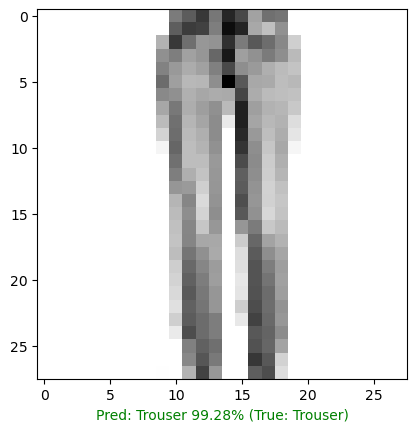

In [159]:
# Check out a random image as well as its prediction
plot_random_iamge(model_14, test_data_norm, test_labels, class_names)

## What patterns is our model learning?

In [160]:
# Find the layers of our most recent model
model_14.layers

In [161]:
# Extract a particular layer
model_14.layers[1]

In [162]:
# Get the pattern of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.11064213,  0.29055655,  0.759642  , -0.8298165 ],
        [ 0.36827642, -0.94877   ,  1.0549414 , -0.3253767 ],
        [ 0.7187845 , -0.09343319,  0.66284347, -0.97807795],
        ...,
        [ 0.14645427,  0.03134478, -0.644624  , -0.31573176],
        [ 0.2186753 ,  0.16621652, -0.3910103 , -0.59631246],
        [ 0.49104056,  0.13433595,  0.26245   , -0.6296031 ]],
       dtype=float32),
 (784, 4))

In [163]:
biases, biases.shape

(array([-0.3651414 ,  0.30119866,  0.6274296 ,  1.110698  ], dtype=float32),
 (4,))

Every neuron has a bias vector paired with a weights matrix.

The bias vector get initilised as zeros.

Biase vecto dictates how much the patterns within the corresponding weights matrix should infuence the next layer.

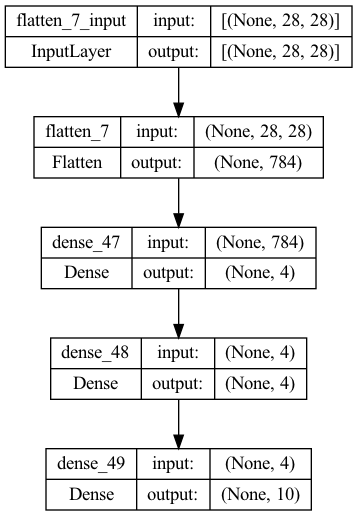

In [164]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes= True)

# Check out excerises and extra curriculum